**Sobre a base de dados**

Os dados de rotatividade de clientes de telecomunicações contêm informações sobre uma empresa de telecomunicações fictícia que forneceu serviços de telefone residencial e Internet para 7.043 clientes na Califórnia.

**Dicionário de dados**


* CustomerId: Customer Id
* Gender: Gender
* SeniorCitizen: Whether the customer is elderly (1.0)
* Partner: Whether the customer has a partner (Yes, No)
* Dependents: Whether the customer has dependents (Yes, No) (child, mother, father...)
* tenure: The number of months the customer stays in the company
* PhoneService: Whether the customer has phone service (Yes, No)
* MultipleLines: Whether the customer has more than one line (Yes, No, No phone service)
* InternetService: Customer's internet service provider (DSL, Fiber optic, No)
* OnlineSecurity: Whether the customer has online security (Yes, No, no Internet service)
* OnlineBackup: Whether the customer has an online backup (Yes, No, no Internet service)
* DeviceProtection: Whether the customer has device protection (Yes, No, no Internet service)
* TechSupport: Whether the customer receives technical support (Yes, No, no Internet service)
* StreamingTV: Whether the customer has broadcast TV (Yes, No, no Internet service)
* StreamingMovies: Whether the customer is streaming movies (Yes, No, no Internet service)
* Contract: Customer's contract period (Month to month, One year, Two years)
* PaperlessBilling: Whether the customer has a paperless invoice (Yes, No)
* PaymentMethod: Customer's payment method (Electronic check, Postal check, Bank transfer, Credit card)
* MonthlyCharges: Amount collected from the customer monthly
* TotalCharges: Total amount collected from the customer
* Churn: Yes = the customer left the company this Month. No = the customer remained with the company.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = 'https://raw.githubusercontent.com/profEraylson/datasets/main/churn_telecom.csv'

df = pd.read_csv(path)

#### Faça uma comparação entre os modelos Regressão Logistica, KNN e Decision Tree e responda as seguintes perguntas:

* Qual modelo apresenta o maior desempenho em treinamento?
* Qual modelo apresenta o maior desempenho em teste?
* Qual modelo você selecionaria para colocar em um sistema de previsão de churn?


Aplique as técnicas vistas em aula e selecione uma ou mais métricas de classificação para avaliar o desempenho dos modelos.


---


*Utilize o seu conhecimento sobre os dados para selecionar e tratar as features da melhor forma.*

*Busque justificar a escolha das técnicas. Exemplo: "Estou aplicando a transformação OneHotEncoder pois...", "Estou utilizando um crossvalidation pois..."*


### Validação Dos Dados

In [ ]:
df.head(5)

In [ ]:
df.tail(5)

In [ ]:
df.info()

In [ ]:
df.isna().sum()

In [ ]:
df.index

### Analisando Váriáveis Numéricas

In [ ]:
df_numeros = df.select_dtypes('number')

In [ ]:
df_numeros

In [ ]:
colunas_to_drop = ['SeniorCitizen']

df_numeros = df_numeros.drop(colunas_to_drop, axis = 1)

In [ ]:
df_numeros

In [ ]:
df_numeros.describe()

In [ ]:
df_numeros['TotalCharges'] = df['TotalCharges']
df_numeros['TotalCharges'] = pd.to_numeric(df_numeros['TotalCharges'], errors='coerce')

In [ ]:
df_numeros.isna().sum()

In [ ]:
media_coluna = df_numeros['TotalCharges'].mean()
df_numeros['TotalCharges'] = df_numeros['TotalCharges'].fillna(media_coluna)

In [ ]:
df_numeros.isna().sum()

Análise: analisando as variéveis númericas, no gráfico abaixo é visto que em relação as pessoas que permanecem na empresa (tenure) há uma grande permanência inicial que com o tempo vai alternando entres altos e baixos, até ter novamente uma alta de permanência.

Em relação ao valor cobrado mensalmente (MonthlyCharges) há uma grande alta de clientes que a medida que vai se passando os meses, vai ocorrendo altos e baixos nas cobranças mensais.

Em relação ao valor total cobrado do cliente (TotalCharges), há uma alta arrecadação inicial que com o tempo, mesmo que a proporção de pagantes diminua, o valor arrecadado já está na faixa de 8000 reais.

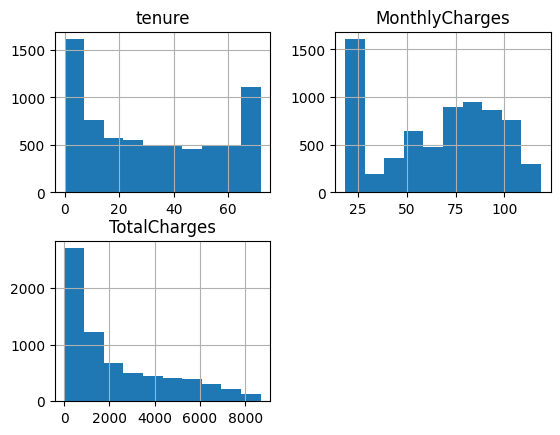

In [ ]:
df_numeros.hist();

Análise: Como visto no gráfico abaixo, não há outliers a serem tratados.

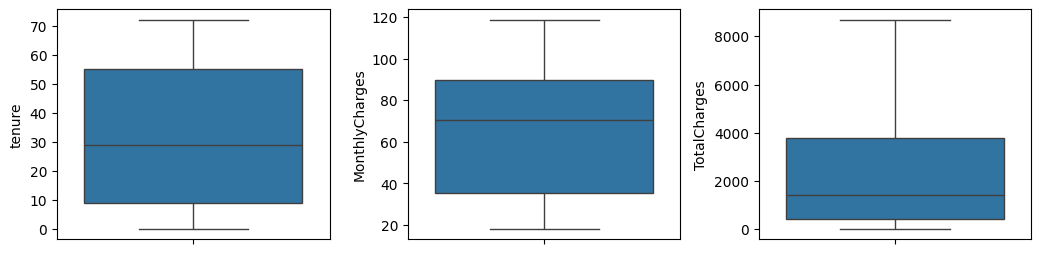

In [ ]:
fig = plt.figure(figsize=(14,15))
for index, col in enumerate(df_numeros.columns):
    plt.subplot(6,4,index+1)
    sns.boxplot(y=col, data=df_numeros)
fig.tight_layout(pad=1.0)

In [ ]:
df['Churn'] = df['Churn'].map({'Yes': 1, "No": 0})
df_numeros['Churn'] = df['Churn']

In [ ]:
figura, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df_numeros.corr('spearman'), annot=True, ax=ax);

### Analisando Variáveis Categóricas

In [ ]:
df.dtypes

In [ ]:
cat_columns = df.select_dtypes('object').columns
cat_columns

In [ ]:
cat_columns = list(cat_columns)
df_categoricas = df[cat_columns]
df_categoricas

In [ ]:
df_categoricas['customerID'].nunique()

In [ ]:
drop_categoricas = ['customerID', 'TotalCharges']

In [ ]:
df_categoricas = df_categoricas.drop(drop_categoricas, axis = 1)

In [ ]:
cat_columns = df_categoricas

In [ ]:
df_categoricas

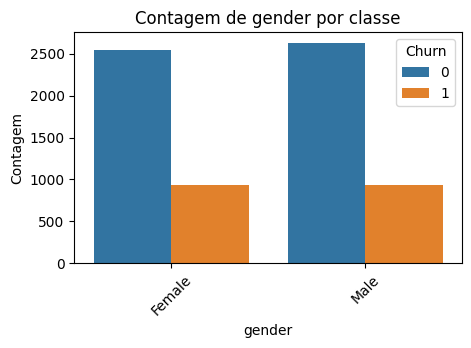

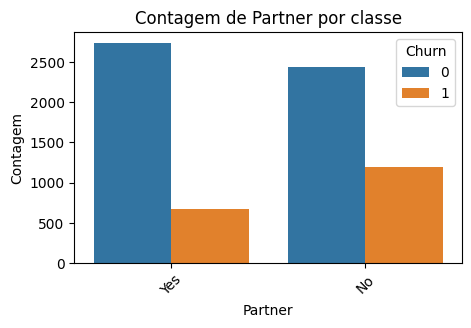

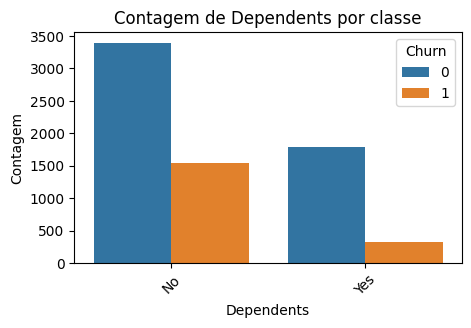

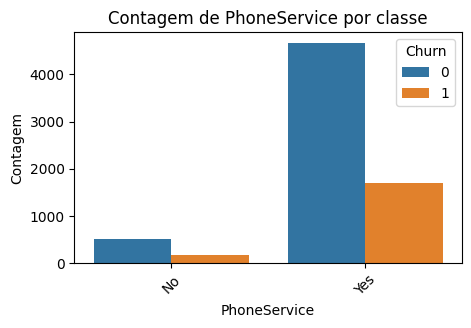

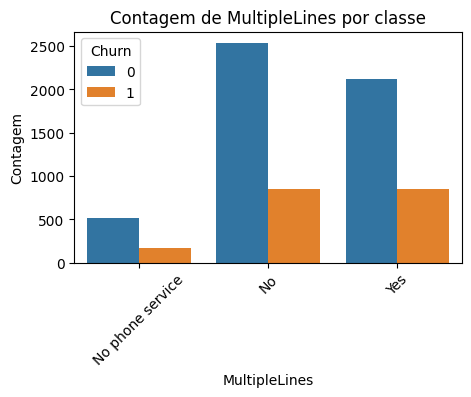

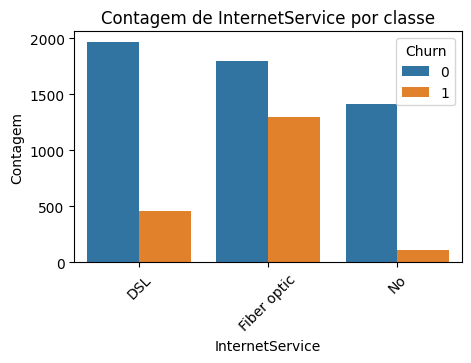

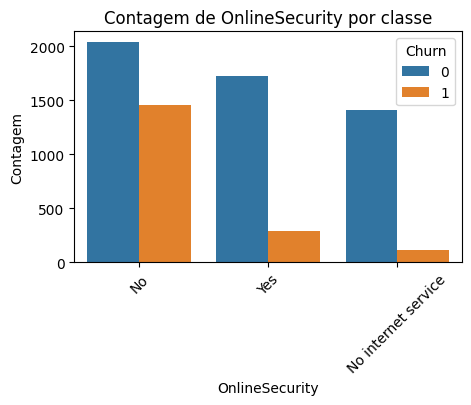

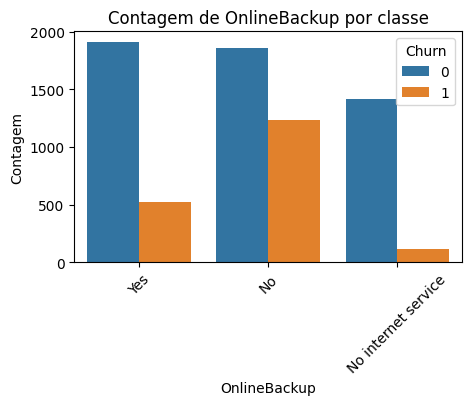

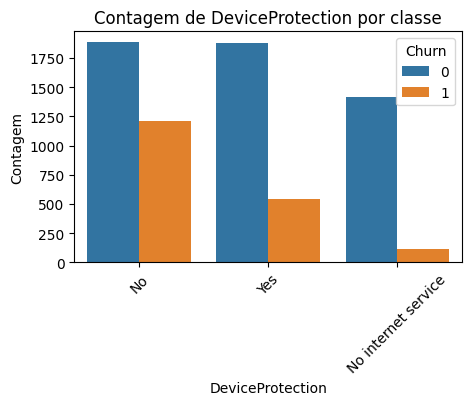

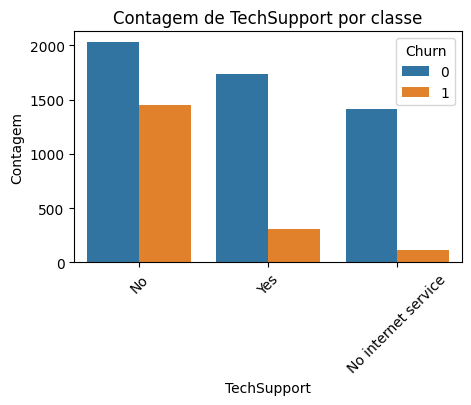

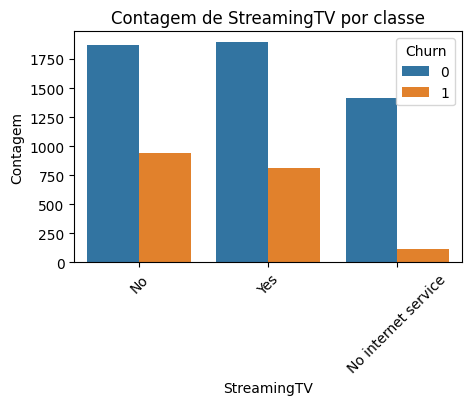

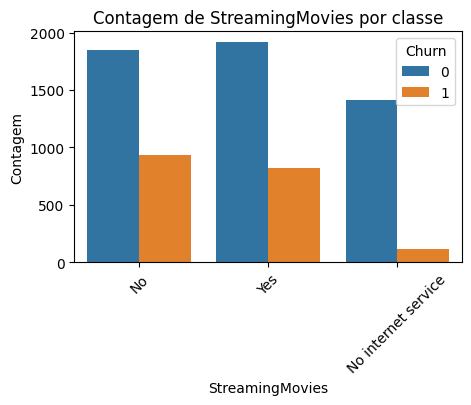

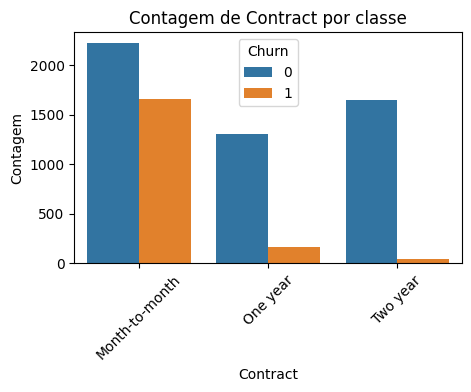

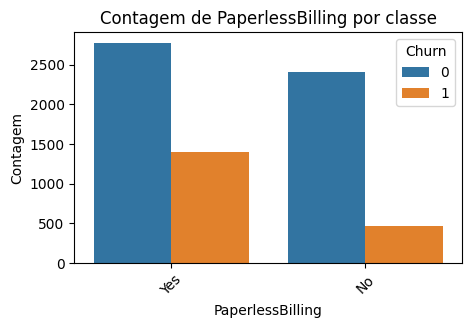

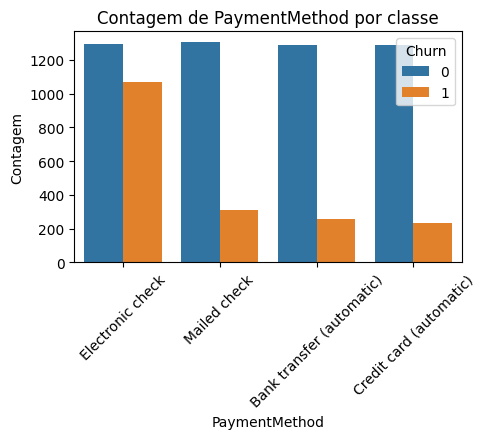

In [ ]:
for cat_column in cat_columns:
    plt.figure(figsize=(5, 3))
    sns.countplot(data=df, x=cat_column, hue='Churn')
    plt.title(f'Contagem de {cat_column} por classe')
    plt.xlabel(cat_column)
    plt.ylabel('Contagem')
    plt.xticks(rotation=45)
    plt.show()

Análise: Gerando a matriz de contigência para analisar as variâncias dos valores das colunas categóricas em relação a coluna alvo (churn) para assim descartar as variavéis que possuem pouquissíma variação e manter apenas as variáveis que de fato irão para o modelo de previsão.

In [ ]:
for coluna in cat_columns:
  mensagem = f"Tabela de contigência entre {coluna} e o churn"
  print(len(mensagem) * "-")
  print(mensagem)
  print(len(mensagem) * "-")
  print(pd.crosstab(df_categoricas[coluna], df['Churn'], normalize='index').mul(100).round(2))
  print(len(mensagem) * "#")

--------------------------------------------
Tabela de contigência entre gender e o churn
--------------------------------------------
Churn       0      1
gender              
Female  73.08  26.92
Male    73.84  26.16
############################################
---------------------------------------------
Tabela de contigência entre Partner e o churn
---------------------------------------------
Churn        0      1
Partner              
No       67.04  32.96
Yes      80.34  19.66
#############################################
------------------------------------------------
Tabela de contigência entre Dependents e o churn
------------------------------------------------
Churn           0      1
Dependents              
No          68.72  31.28
Yes         84.55  15.45
################################################
--------------------------------------------------
Tabela de contigência entre PhoneService e o churn
--------------------------------------------------
Churn          

In [ ]:
drop_categoricas = ['gender', 'PhoneService', 'MultipleLines']

In [ ]:
df_categoricas = df_categoricas.drop(drop_categoricas, axis = 1)

In [ ]:
df_categoricas

### Recorte da Base de Dados


In [ ]:
df_numeros.isna().sum()

In [ ]:
df_categoricas.isna().sum()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_selected = pd.concat([df_numeros,df_categoricas], axis=1)

In [ ]:
df_selected.isna().sum()

In [ ]:
X = df_selected.drop('Churn', axis = 1)
y = df_selected['Churn']

In [ ]:
X

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train.value_counts(normalize=True)

In [ ]:
y_test.value_counts(normalize=True)

### Tratamento das Features Categóricas


Análise: Para o tratamento das features categóricas, utilizei o metódo One Hot Encoder, por mais que ocorra do modelo acabar tendo bastante colunas, optei por esse metódo porque todas as colunas as quais foram escolhidas, possuem em torno de 2 a 4 valores, que é uma quantidade de valores o qual pode ser tratada através do One Hot Encoder.

In [ ]:
#pip install category_encoders

In [ ]:
from category_encoders.one_hot import OneHotEncoder
from category_encoders.target_encoder  import TargetEncoder
from category_encoders.ordinal  import OrdinalEncoder

In [ ]:
cat_to_onehot = ['Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Contract', 'PaymentMethod']
one_hot_enc = OneHotEncoder(cols = cat_to_onehot)
one_hot_enc.fit(X_train)
X_train_encode = one_hot_enc.transform(X_train)
X_train_encode

In [ ]:
X_train_encode.info()

In [ ]:
X_test_encode = one_hot_enc.transform(X_test)

Análise: Como dito anteriormente, não foi necessário o tratamento para Outliers e também não foi necessário o tratamento para valores nulos.

In [ ]:
X_train_encode.isna().sum()

tenure                0
MonthlyCharges        0
TotalCharges          0
Partner_1             0
Partner_2             0
Dependents_1          0
Dependents_2          0
InternetService_1     0
InternetService_2     0
InternetService_3     0
OnlineSecurity_1      0
OnlineSecurity_2      0
OnlineSecurity_3      0
OnlineBackup_1        0
OnlineBackup_2        0
OnlineBackup_3        0
DeviceProtection_1    0
DeviceProtection_2    0
DeviceProtection_3    0
TechSupport_1         0
TechSupport_2         0
TechSupport_3         0
StreamingTV_1         0
StreamingTV_2         0
StreamingTV_3         0
StreamingMovies_1     0
StreamingMovies_2     0
StreamingMovies_3     0
Contract_1            0
Contract_2            0
Contract_3            0
PaperlessBilling_1    0
PaperlessBilling_2    0
PaymentMethod_1       0
PaymentMethod_2       0
PaymentMethod_3       0
PaymentMethod_4       0
dtype: int64

In [ ]:
X_train_encode.describe()

In [ ]:
#Normalização

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().set_output(transform = "pandas")
scaler.fit(X_train_encode)
X_train_norm = scaler.transform(X_train_encode)
X_test_norm = scaler.transform(X_test_encode)

In [ ]:
X_train_norm.describe()

### Modelagem/Treinamento

* Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train_norm, y_train)

LogisticRegression(random_state=42)

In [ ]:
predict_train = clf.predict(X_train_norm)
predict_test = clf.predict(X_test_norm)

In [ ]:
from sklearn.metrics import accuracy_score as ACC

ACC(y_train, predict_train)

0.7976570820021299

In [ ]:
y_train.value_counts(normalize=True)

0    0.734469
1    0.265531
Name: Churn, dtype: float64

Análise: Para o teste houve uma acurrácia de mais de quase 82%, a classificação do teste se saiu melhor que a do treinamento.

In [ ]:
ACC(y_test, predict_test)

0.8183108587650816

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

Análise: Na matriz abaixo, o treinamento para a regressão logistica obteve uma precisão de identificação para 3702 casos de verdadeiros positivos para 0 e de 792 casos de verdadeiros positivos para 1. A precisão de verdadeiros positivos tanto para 0 ou para 1, foi maior em relação a quantidade de falsos negativos para 0 e 1.

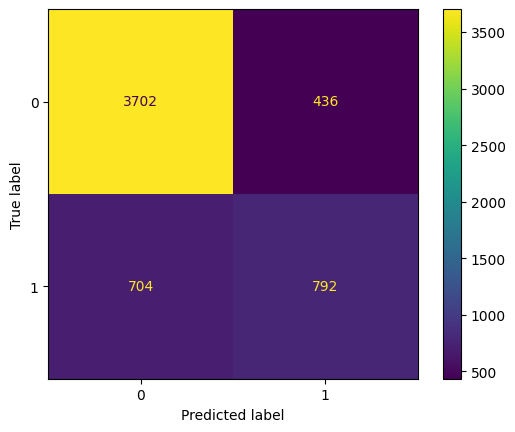

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, predict_train);

Análise: Na matriz abaixo, o teste para a regressão logistica obteve uma precisão de identificação para 932 casos de verdadeiros positivos para 0 e de 221 casos de verdadeiros positivos para 1. A precisão de verdadeiros positivos tanto para 0 ou para 1, foi maior em relação a quantidade de falsos negativos para 0 e 1.

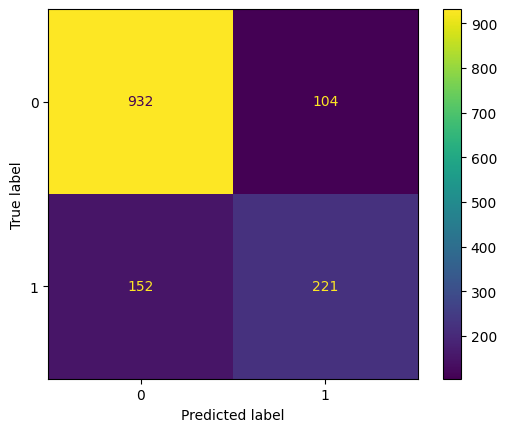

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, predict_test);

In [ ]:
from sklearn.metrics import classification_report

Análise: Para o treinamento as precisões para classificar pessoas que não tendem a deixar a empresa (0) foram boas, algo em torno de quase 85% e quase 90%. Já para a classificação de pessoas que tendem a deixar a empresa (1) as precisões tiveram uma baixa, algo em torno de quase 65%, 53% e quase 60%. a acurrácia foi de 80%.

In [ ]:
print(classification_report(y_train, predict_train, zero_division = 0))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      4138
           1       0.64      0.53      0.58      1496

    accuracy                           0.80      5634
   macro avg       0.74      0.71      0.72      5634
weighted avg       0.79      0.80      0.79      5634



Análise: Para o teste as precisões para classificar pessoas que não tendem a deixar a empresa (0) foram boas, algo em torno de quase 90% levando em consideração a precisão, recall e f1-score. Já para a classificação de pessoas que tendem a deixar a empresa a (1) as precisões tiveram uma queda para o recall e para o f1_score, sendo respectivamente de quase 60% o percentual de ambas e para a precisão, foi um resultado razoavelmente bom de quase 70%. a acurrácia foi de 82%.

In [ ]:
print(classification_report(y_test, predict_test, zero_division = 0))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.81      1409



=====================================================================

* KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [ ]:
neigh.fit(X_train_norm, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
predict_train = neigh.predict(X_train_norm)
predict_test = neigh.predict(X_test_norm)

Análise: Para o KNN a classificação no treinamento de verdadeiros positivos foi mais acertiva que a regressão logística e para falsos negativos se saiu melhor também que a regressão logística.

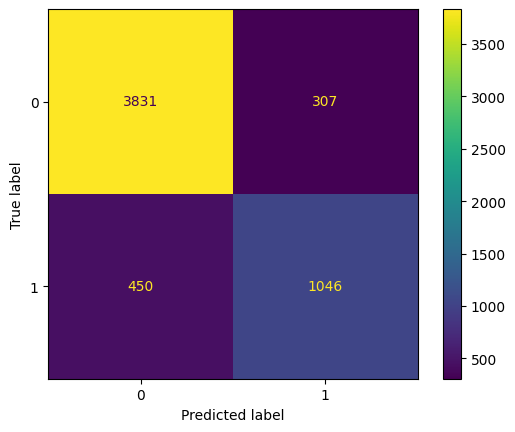

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, predict_train);

Análise: Já em relação ao teste o KNN não se saiu melhor que a regressão logísstica para a classificação de falsos positivos e também se saiu mal nos falsos negativos.

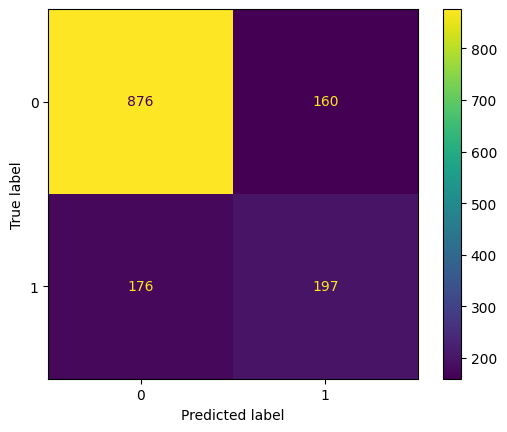

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, predict_test);

Análise: No treinamento, o KNN para a classificação de pessoas que não tendem a deixar a empresa (0) se saiu muito bem no treinamento, com percentuais no geral acima de 90% e em relação a classificação de pessoas que tendem a deixar (1) se saiu bem onde foi acima de 70% no geral. a acurrácia foi de 87%.

In [ ]:
print(classification_report(y_train, predict_train, zero_division = 0))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4138
           1       0.77      0.70      0.73      1496

    accuracy                           0.87      5634
   macro avg       0.83      0.81      0.82      5634
weighted avg       0.86      0.87      0.86      5634



Análise: Já no teste, para a classficação para pessoas que não tendem a deixar a empresa, se saiu bem de maneira geral, algo em torno de 85%, já para pessoas que tendem a deixar, a classificação caiu bastante, chegando a 55% em geral. a acurrácia foi de 76%.

In [ ]:
print(classification_report(y_test, predict_test, zero_division = 0))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1036
           1       0.55      0.53      0.54       373

    accuracy                           0.76      1409
   macro avg       0.69      0.69      0.69      1409
weighted avg       0.76      0.76      0.76      1409



===============================================================================

* Árvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_norm, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
predict_train = clf.predict(X_train_norm)
predict_test = clf.predict(X_test_norm)

Análise: A árvore decisão no treinamento para a classificação de verdadeiros positivos se saiu muito melhor que q a regressão logística e o KNN e em relação aos falsos negativos também se saiu muito melhor, com baixas classificações erradas.

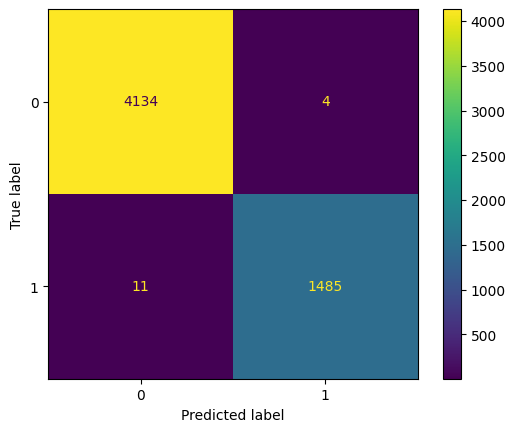

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, predict_train);

Análise: Já em relação ao teste teve um desempenho abaixo em comparação com os outros dois, tanto para a classificação de verdadeiros positivos como para falsos negativos.

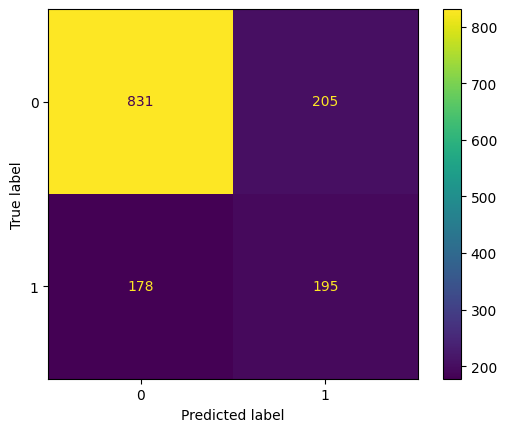

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, predict_test);

Análise: Nas duas classificações, para pessoas que tendem a deixar a empresa e as que não tendem, o modelo teve um ótimo desempenho, chegando a um percentual de 100%. a acurrácia foi de 100%.

In [ ]:
print(classification_report(y_train, predict_train, zero_division = 0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       1.00      0.99      0.99      1496

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634



Análise: Já no teste o desempenho para classificar pessoas que não tendem a deixar a empresa se manteve alto, cerca de mais de 80%, mas em relação a classificação de pessoas que tendem a deixar a empresa, o percentual caiu pela metade, chegando a 50% de maneira geral, o que indica que houve a ocorrência de um overfiting na árvore de decisão, ou seja, ela decorou os dados no treinamento e acabou por ter um desempenho muito bom e quando chegou no teste com dados que ela nunca viu, seu desempenho ficou bem abaixo em comparação do que ocorreu no treinamento.

In [ ]:
print(classification_report(y_test, predict_test, zero_division = 0))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1036
           1       0.49      0.52      0.50       373

    accuracy                           0.73      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.73      0.73      0.73      1409



================================================================================

### Modelagem com gridsearch

In [ ]:
X_train_reduzido, X_val, y_train_reduzido, y_val = train_test_split(X_train_norm, y_train, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import f1_score

penaltys = [None, 'l1', 'l2', 'elasticnet']
solvers = ['lbfgs', 'liblinear']

best_f1_score = 0
best_penalty = None
best_solver = None


for penalty in penaltys:
  for solver in solvers:
    print(f'{penalty} e {solver}')
    try:

      logistic = LogisticRegression(penalty = penalty, solver=solver, random_state=42)
      logistic.fit(X_train_reduzido, y_train_reduzido)
      pred_val = logistic.predict(X_val)

    except ValueError:
      print(f"{penalty} e {solver} não podem ser combinados!")
      continue

    f1 = f1_score(y_val, pred_val)
    print(f1)
    if f1 > best_f1_score:

      best_f1_score = f1
      best_penalty = penalty
      best_solver = solver

None e lbfgs
0.5841035120147874
None e liblinear
None e liblinear não podem ser combinados!
l1 e lbfgs
l1 e lbfgs não podem ser combinados!
l1 e liblinear
0.5777777777777777
l2 e lbfgs
0.5767097966728281
l2 e liblinear
0.5767097966728281
elasticnet e lbfgs
elasticnet e lbfgs não podem ser combinados!
elasticnet e liblinear
elasticnet e liblinear não podem ser combinados!


In [ ]:
(best_penalty, best_solver)

(None, 'lbfgs')

In [ ]:
logistic = LogisticRegression(penalty = best_penalty, solver=best_solver, random_state=42)
logistic.fit(X_train_norm, y_train)

LogisticRegression(penalty=None, random_state=42)

In [ ]:
ks = [3, 5, 7, 9, 11, 13, 15, 17, 19]
best_f1_score = 0
best_k = None
for k in ks:
  neigh = KNeighborsClassifier(n_neighbors=k)
  neigh.fit(X_train_reduzido, y_train_reduzido)
  y_pred = neigh.predict(X_val)
  f1 = f1_score(y_val, y_pred)
  if f1 > best_f1_score:
    best_f1_score = f1
    best_k = k

In [ ]:
best_f1_score

0.5853658536585367

In [ ]:
best_k

11

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(X_train_norm, y_train)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
criterios = ['gini', 'entropy', 'log_loss']
max_depths = [10, 20, 30, 40, 50, 100]
best_f1_score = 0
best_criterio = None
best_max_depth = None


for criterio in criterios:
  for max_depth in max_depths:
    decTree = DecisionTreeClassifier(criterion=criterio, max_depth=max_depth, random_state=42)
    decTree.fit(X_train_reduzido, y_train_reduzido)

    y_pred = decTree.predict(X_val)
    f1 = f1_score(y_val, y_pred)
    if f1 > best_f1_score:
      best_f1_score = f1
      best_criterio = criterio
      best_max_depth = max_depth

In [ ]:
(best_criterio, best_max_depth, best_f1_score)

('entropy', 10, 0.5314183123877917)

In [ ]:
decTree = DecisionTreeClassifier(criterion=best_criterio, max_depth=best_max_depth, random_state=42)
decTree.fit(X_train_norm, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

Análise: Na modelagem gridsearch onde se busca encontrar os melhores hiperparâmetros para os modelos até aqui utilizados (Regressão logística, KNN e Árvore de Decisão) em relação ao treinamento dos modelos usando essa abordagem e fazendo um comprativo entre eles, podemos notar que a árvore de decisão se saiu melhor que a regressão logística e o KNN, porém como já foi visto antes, acredita-se que esse alto desempenho da árvore de decisão, deva ser pela ocorrência de overfiting, onde ela decorou os dados de treinamento.

In [ ]:
#### Comparando os modelos

y_pred_train_logist = logistic.predict(X_train_norm)
y_pred_train_knn = neigh.predict(X_train_norm)
y_pred_train_dt = decTree.predict(X_train_norm)

y_pred_test_logist = logistic.predict(X_test_norm)
y_pred_test_knn = neigh.predict(X_test_norm)
y_pred_test_dt = decTree.predict(X_test_norm)

print(f'------------Regressão Logistica Treinamento:')
print(classification_report(y_train, y_pred_train_logist, zero_division = 0))
print(f'------------KNN Treinamento:')
print(classification_report(y_train, y_pred_train_knn, zero_division = 0))
print(f'------------Decision Tree Treinamento:')
print(classification_report(y_train, y_pred_train_dt, zero_division = 0))

------------Regressão Logistica Treinamento:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      4138
           1       0.65      0.53      0.59      1496

    accuracy                           0.80      5634
   macro avg       0.74      0.71      0.73      5634
weighted avg       0.79      0.80      0.79      5634

------------KNN Treinamento:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4138
           1       0.67      0.58      0.62      1496

    accuracy                           0.81      5634
   macro avg       0.76      0.74      0.75      5634
weighted avg       0.81      0.81      0.81      5634

------------Decision Tree Treinamento:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      4138
           1       0.76      0.72      0.74      1496

    accuracy                           0.86      5634
   macro avg   

Análise: No teste pode-se notar que a regressão logística que se saiu melhor que a árvore de decisão e o KNN, vale ressaltar que o baixo desempenho da árvore de decisão (que se saiu muito bem no treinamento anteriormente) no teste, foi o que aconteceu anteriomente de fato, a ocorrência de overfiting.

In [ ]:
print(f'------------Regressão Logistica Teste:')
print(classification_report(y_test, y_pred_test_logist, zero_division = 0))
print(f'------------KNN Teste:')
print(classification_report(y_test, y_pred_test_knn, zero_division = 0))
print(f'------------Decision Tree Teste:')
print(classification_report(y_test, y_pred_test_dt, zero_division = 0))

------------Regressão Logistica Teste:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409

------------KNN Teste:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1036
           1       0.61      0.54      0.58       373

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409

------------Decision Tree Teste:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1036
           1       0.59      0.55      0.57       373

    accuracy                           0.78      1409
   macro avg       0.71      0.71

### Tecnicas para aumentar o desempenho

### Cross Validation

(Obs.: A análise do cross validation, vai estar ao final desse tópico, onde vai estar o compilado da comparação entre os modelos, com essa técinica aplicada)

In [ ]:
from sklearn.model_selection import GridSearchCV

* Árvore de Decisão

In [ ]:
parameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth' : [10, 20, 30, 40, 50, 100],
    'class_weight' : [ {0:1, 1:1}, {0:1, 1:2}, {0:1, 1:4}, {0:1, 1:8}, {0:1, 1:10} ]
  }

dt = DecisionTreeClassifier()
dt = GridSearchCV(dt, parameters, cv = 5, scoring = 'f1_macro')
dt.fit(X_train_norm, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 4}, {0: 1, 1: 8},
                                          {0: 1, 1: 10}],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 20, 30, 40, 50, 100]},
             scoring='f1_macro')

In [ ]:
pd.DataFrame( dt.cv_results_ )[['params','mean_test_score']]

,params,mean_test_score
0,"{'class_weight': {0: 1, 1: 1}, 'criterion': 'g...",0.687761
1,"{'class_weight': {0: 1, 1: 1}, 'criterion': 'g...",0.655031
2,"{'class_weight': {0: 1, 1: 1}, 'criterion': 'g...",0.654704
3,"{'class_weight': {0: 1, 1: 1}, 'criterion': 'g...",0.657877
4,"{'class_weight': {0: 1, 1: 1}, 'criterion': 'g...",0.658147
...,...,...
85,"{'class_weight': {0: 1, 1: 10}, 'criterion': '...",0.676760
86,"{'class_weight': {0: 1, 1: 10}, 'criterion': '...",0.674230
87,"{'class_weight': {0: 1, 1: 10}, 'criterion': '...",0.673364
88,"{'class_weight': {0: 1, 1: 10}, 'criterion': '...",0.667107


In [ ]:
dt.best_params_

{'class_weight': {0: 1, 1: 2}, 'criterion': 'gini', 'max_depth': 10}

In [ ]:
best_model = dt.best_estimator_

In [ ]:
predict_train = best_model.predict(X_train_norm)
predict_test= best_model.predict(X_test_norm)

In [ ]:
print(f'------------Decision Tree Treinamento:')
print(classification_report(y_train, predict_train, zero_division = 0))

------------Decision Tree Treinamento:
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      4138
           1       0.65      0.89      0.75      1496

    accuracy                           0.84      5634
   macro avg       0.80      0.86      0.82      5634
weighted avg       0.87      0.84      0.85      5634



In [ ]:
print(f'------------Decision Tree Teste:')
print(classification_report(y_test, predict_test, zero_division = 0))

------------Decision Tree Teste:
              precision    recall  f1-score   support

           0       0.87      0.75      0.81      1036
           1       0.50      0.69      0.58       373

    accuracy                           0.74      1409
   macro avg       0.69      0.72      0.70      1409
weighted avg       0.78      0.74      0.75      1409



* KNN

In [ ]:
parameters_knn = {
    'n_neighbors' : [3, 5, 7, 9, 11, 13, 15, 17, 19],
    'weights': ['uniform', 'distance']
  }

knn = KNeighborsClassifier()
knn = GridSearchCV(knn, parameters_knn, cv = 5, scoring = 'f1_macro')
knn.fit(X_train_norm, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'weights': ['uniform', 'distance']},
             scoring='f1_macro')

In [ ]:
pd.DataFrame( knn.cv_results_ )[['params','mean_test_score']]

,params,mean_test_score
0,"{'n_neighbors': 3, 'weights': 'uniform'}",0.676294
1,"{'n_neighbors': 3, 'weights': 'distance'}",0.667153
2,"{'n_neighbors': 5, 'weights': 'uniform'}",0.690946
3,"{'n_neighbors': 5, 'weights': 'distance'}",0.674325
4,"{'n_neighbors': 7, 'weights': 'uniform'}",0.698513
5,"{'n_neighbors': 7, 'weights': 'distance'}",0.678586
6,"{'n_neighbors': 9, 'weights': 'uniform'}",0.694522
7,"{'n_neighbors': 9, 'weights': 'distance'}",0.686421
8,"{'n_neighbors': 11, 'weights': 'uniform'}",0.699709
9,"{'n_neighbors': 11, 'weights': 'distance'}",0.690309


In [ ]:
knn.best_params_

{'n_neighbors': 17, 'weights': 'uniform'}

In [ ]:
best_model_knn = knn.best_estimator_

In [ ]:
predict_train_knn = best_model_knn.predict(X_train_norm)
predict_test_knn = best_model_knn.predict(X_test_norm)

In [ ]:
print(f'------------KNN Treinamento:')
print(classification_report(y_train, predict_train_knn, zero_division = 0))

------------KNN Treinamento:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4138
           1       0.64      0.57      0.60      1496

    accuracy                           0.80      5634
   macro avg       0.75      0.73      0.74      5634
weighted avg       0.80      0.80      0.80      5634



In [ ]:
print(f'------------KNN Teste:')
print(classification_report(y_test, predict_test_knn, zero_division = 0))

------------KNN Teste:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1036
           1       0.62      0.57      0.60       373

    accuracy                           0.79      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.79      0.79      1409



================================================================================

* Regressão Logística

In [ ]:
parameters_rl = {
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
  }

rl = LogisticRegression()
rl = GridSearchCV(rl, parameters_rl, cv = 5, scoring = 'f1_macro')
rl.fit(X_train_norm, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='f1_macro')

In [ ]:
pd.DataFrame( rl.cv_results_ )[['params','mean_test_score']]

In [ ]:
rl.best_params_

{'solver': 'liblinear'}

In [ ]:
best_model_rl = rl.best_estimator_

In [ ]:
predict_train_rl = best_model_rl.predict(X_train_norm)
predict_test_rl= best_model_rl.predict(X_test_norm)

In [ ]:
print(f'------------Regressão Logística Treinamento:')
print(classification_report(y_train, predict_train_rl, zero_division = 0))

------------Regressão Logística Treinamento:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      4138
           1       0.65      0.53      0.58      1496

    accuracy                           0.80      5634
   macro avg       0.74      0.71      0.72      5634
weighted avg       0.79      0.80      0.79      5634



In [ ]:
print(f'------------Regressão Logística Teste:')
print(classification_report(y_test, predict_test_rl, zero_division = 0))

------------Regressão Logística Teste:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.81      1409



Análise do Cross validation: por uma questão de organização, acima eu realizei os prints de treinamento e teste separadamente de cada modelo, mas para facilitar a visualização da análise irei replicar aqui, os prints acima para comprarar o desempenho dos modelos:

In [ ]:
print("################ CROSS VALIDATION ################\n")

print(f'------------Regressão Logística Treinamento:')
print(classification_report(y_train, predict_train_rl, zero_division = 0))

print("\n")

print(f'------------KNN Treinamento:')
print(classification_report(y_train, predict_train_knn, zero_division = 0))

print("\n")

print(f'------------Decision Tree Treinamento:')
print(classification_report(y_train, predict_train, zero_division = 0))

################ CROSS VALIDATION ################

------------Regressão Logística Treinamento:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      4138
           1       0.65      0.53      0.58      1496

    accuracy                           0.80      5634
   macro avg       0.74      0.71      0.72      5634
weighted avg       0.79      0.80      0.79      5634



------------KNN Treinamento:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4138
           1       0.64      0.57      0.60      1496

    accuracy                           0.80      5634
   macro avg       0.75      0.73      0.74      5634
weighted avg       0.80      0.80      0.80      5634



------------Decision Tree Treinamento:
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      4138
           1       0.65      0.89      0.75      1496

    accuracy 

No treinamento, de maneira geral a árvore de decisão se saiu melhor na classificação de pessoas que tendem e que não tendem a deixar a empresa, abaixo vamos analisar o teste de cada modelo.

In [ ]:
print("################ CROSS VALIDATION ################\n")

print(f'------------Regressão Logística Teste:')
print(classification_report(y_test, predict_test_rl, zero_division = 0))

print("\n")

print(f'------------KNN Teste:')
print(classification_report(y_test, predict_test_knn, zero_division = 0))

print("\n")

print(f'------------Decision Tree Teste:')
print(classification_report(y_test, predict_test, zero_division = 0))


################ CROSS VALIDATION ################

------------Regressão Logística Teste:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.81      1409



------------KNN Teste:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1036
           1       0.62      0.57      0.60       373

    accuracy                           0.79      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.79      0.79      1409



------------Decision Tree Teste:
              precision    recall  f1-score   support

           0       0.87      0.75      0.81      1036
           1       0.50      0.69      0.58       373

    accuracy                   

Em relação ao teste, a regressão logística se saiu melhor que a árvore de decisão e o KNN para a classificação de pessoas que tentem e que não tendem a deixar a empresa.

### StratifiedKFold

(Obs.: Novamente a análise ao final)

In [ ]:
from sklearn.model_selection import StratifiedKFold

* Árvore de Decisão

In [ ]:
parameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth' : [10, 20, 30, 40, 50, 100],
    'class_weight' : [ {0:1, 1:1}, {0:1, 1:2}, {0:1, 1:4}, {0:1, 1:8}, {0:1, 1:10} ]
  }

kfolds = StratifiedKFold(5)
dt = DecisionTreeClassifier()
dt = GridSearchCV(dt, parameters, scoring = 'f1_macro', cv= kfolds.split(X_train_norm,y_train))
dt.fit(X_train_norm, y_train)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x7c1dbfa266c0>,
             estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 4}, {0: 1, 1: 8},
                                          {0: 1, 1: 10}],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 20, 30, 40, 50, 100]},
             scoring='f1_macro')

In [ ]:
dt.best_params_

{'class_weight': {0: 1, 1: 2}, 'criterion': 'gini', 'max_depth': 10}

In [ ]:
best_model = dt.best_estimator_
predict_train = best_model.predict(X_train_norm)
predict_test= best_model.predict(X_test_norm)

In [ ]:
print(f'------------Decision Tree Treinamento:')
print(classification_report(y_train, predict_train, zero_division = 0))

------------Decision Tree Treinamento:
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      4138
           1       0.65      0.89      0.75      1496

    accuracy                           0.84      5634
   macro avg       0.80      0.86      0.82      5634
weighted avg       0.87      0.84      0.85      5634



In [ ]:
print(f'------------Decision Tree Teste:')
print(classification_report(y_test, predict_test, zero_division = 0))

------------Decision Tree Teste:
              precision    recall  f1-score   support

           0       0.87      0.75      0.81      1036
           1       0.50      0.69      0.58       373

    accuracy                           0.74      1409
   macro avg       0.69      0.72      0.70      1409
weighted avg       0.78      0.74      0.75      1409



* KNN

In [ ]:
parameters_knn = {
    'n_neighbors' : [3, 5, 7, 9, 11, 13, 15, 17, 19],
    'weights': ['uniform', 'distance']
  }


kfolds = StratifiedKFold(5)
knn = KNeighborsClassifier()
knn = GridSearchCV(knn, parameters_knn, scoring = 'f1_macro', cv= kfolds.split(X_train_norm,y_train))
knn.fit(X_train_norm, y_train)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x7c1db4717370>,
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'weights': ['uniform', 'distance']},
             scoring='f1_macro')

In [ ]:
knn.best_params_

{'n_neighbors': 17, 'weights': 'uniform'}

In [ ]:
best_model_knn = knn.best_estimator_
predict_train_knn = best_model_knn.predict(X_train_norm)
predict_test_knn = best_model_knn.predict(X_test_norm)

In [ ]:
print(f'------------KNN Treinamento:')
print(classification_report(y_train, predict_train_knn, zero_division = 0))

------------KNN Treinamento:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4138
           1       0.64      0.57      0.60      1496

    accuracy                           0.80      5634
   macro avg       0.75      0.73      0.74      5634
weighted avg       0.80      0.80      0.80      5634



In [ ]:
print(f'------------KNN Teste:')
print(classification_report(y_test, predict_test_knn, zero_division = 0))

------------KNN Teste:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1036
           1       0.62      0.57      0.60       373

    accuracy                           0.79      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.79      0.79      1409



*Regressão Logística

In [ ]:
parameters_rl = {
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
  }


kfolds = StratifiedKFold(5)
rl = LogisticRegression()
rl = GridSearchCV(rl, parameters_rl, scoring = 'f1_macro', cv= kfolds.split(X_train_norm,y_train))
rl.fit(X_train_norm, y_train)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x7c1dbf6462d0>,
             estimator=LogisticRegression(),
             param_grid={'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='f1_macro')

In [ ]:
rl.best_params_

{'solver': 'liblinear'}

In [ ]:
best_model_rl = rl.best_estimator_
predict_train_rl = best_model_rl.predict(X_train_norm)
predict_test_rl = best_model_rl.predict(X_test_norm)

In [ ]:
print(f'------------Regressão Logística Treinamento:')
print(classification_report(y_train, predict_train_rl, zero_division = 0))

------------Regressão Logística Treinamento:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      4138
           1       0.65      0.53      0.58      1496

    accuracy                           0.80      5634
   macro avg       0.74      0.71      0.72      5634
weighted avg       0.79      0.80      0.79      5634



In [ ]:
print(f'------------Regressão Logística Teste:')
print(classification_report(y_test, predict_test_rl, zero_division = 0))

------------Regressão Logística Teste:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.81      1409



Análise: StratifiedKFold

In [ ]:
print("================== StratifiedKFold ==================\n")

print(f'------------Regressão Logística Treinamento:')
print(classification_report(y_train, predict_train_rl, zero_division = 0))

print("\n")

print(f'------------KNN Treinamento:')
print(classification_report(y_train, predict_train_knn, zero_division = 0))

print("\n")

print(f'------------Decision Tree Treinamento:')
print(classification_report(y_train, predict_train, zero_division = 0))

================== StratifiedKFold ==================

------------Regressão Logística Treinamento:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      4138
           1       0.65      0.53      0.58      1496

    accuracy                           0.80      5634
   macro avg       0.74      0.71      0.72      5634
weighted avg       0.79      0.80      0.79      5634



------------KNN Treinamento:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4138
           1       0.64      0.57      0.60      1496

    accuracy                           0.80      5634
   macro avg       0.75      0.73      0.74      5634
weighted avg       0.80      0.80      0.80      5634



------------Decision Tree Treinamento:
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      4138
           1       0.65      0.89      0.75      1496

    accura

No treinamento utilizando a técnica StratifiedKFold, a árvore de decisão se saiu melhor que a regressão logística e o KNN, tanto para classificar pessoas que tendem a deixar a empresa como também para as que não tendem a deixar a empresa. Abaixo vamos ver o teste.

In [ ]:
print("================== StratifiedKFold ==================\n")

print(f'------------Regressão Logística Teste:')
print(classification_report(y_test, predict_test_rl, zero_division = 0))

print("\n")

print(f'------------KNN Teste:')
print(classification_report(y_test, predict_test_knn, zero_division = 0))

print("\n")

print(f'------------Decision Tree Teste:')
print(classification_report(y_test, predict_test, zero_division = 0))

================== StratifiedKFold ==================

------------Regressão Logística Teste:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.81      1409



------------KNN Teste:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1036
           1       0.62      0.57      0.60       373

    accuracy                           0.79      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.79      0.79      1409



------------Decision Tree Teste:
              precision    recall  f1-score   support

           0       0.87      0.75      0.81      1036
           1       0.50      0.69      0.58       373

    accuracy                

No teste, a regressão logística se saiu melhor no geral do que a árvore de decisão e o KNN para a classificação de pessoas que tentem e que não tendem a deixar a empresa.

### Respondendo as perguntas do início da atividade

* Qual modelo apresenta o maior desempenho em treinamento?

  <br>

  **Resposta: Em treinamento, a melhor é a árvore de decisão, porém ela tem a ocorrência de overfiting, se desconsiderar isso e analisar precisamente o KNN se saiu melhor que a regressão logística, com uma diferença de 1%, então de maneira mais geral, pode-se dizer que pra treianmento o KNN e a regressçao logística, tiveram um desempenho igual para o treinamento.**

  <br>

* Qual modelo apresenta o maior desempenho em teste?

  **Resposta: Em relação a teste, a regressão logística se saiu melhor que a árvore de decisão e o KNN, obteve bons resultados em relação a entrada de dados novos**

  <br>

* Qual modelo você selecionaria para colocar em um sistema de previsão de churn?

  <br>

  **Resposta: Analisando o desempenho dos modelos até aqui, o modelo que utilizaria seria a regressão logística, por ter tido um bom desempenho pra treinamento, desconsiderando o overfiting da árvore de decisão e por ter empatado de maneira geral com o KNN e no quesito de teste ter ficado a frente dos outros dois modelos, o que signfica que pra dados novos que entram no modelo, o mesmo consegue classificar esses dados de maneira mais satisfatória. E pra finalizar utilizaria a regressão logística aplicando qualquer uma das técnicas vistas acima, já que todas tiveram um desempenho que pode-se dizer igual.**

  <br>

